# **Q1 (1-4)**
Generate dataset with 1000 Samples, 4 Classes and 3 Features by [Sikit-Learn Database](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification), then make classification by [Logisitic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) and [SGD Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier). Also use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and [RandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for tuning hyperparameters.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from mpl_toolkits.mplot3d import Axes3D

# A - Generate Dateset and split

(1000, 3)
(1000,)


Text(0.5, 0.92, 'Generated dataset')

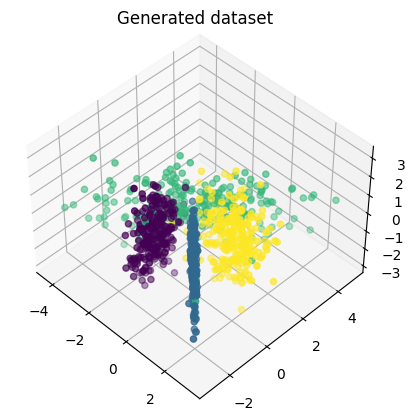

In [25]:
# Generate Dataset
X , y = make_classification(
    n_samples=1000,
    n_features = 3,
    n_redundant = 0,
    n_classes = 4,
    n_clusters_per_class = 1,
    class_sep = 1,
    random_state = 24
    )

# Check Dimensions
print(X.shape)
print(y.shape)

# Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y)
ax.view_init(elev=45, azim=-45)
plt.title('Generated dataset')

In [3]:
# Split Dataset
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

# B - Classification with Logistic Regression

In [4]:
# Design model with default setting
logreg = LogisticRegression(random_state = 24)
LG1= logreg.fit(x_train, y_train)

In [5]:
# Check accuray
LG1_train_score = LG1.score(x_train, y_train)
LG1_test_score = LG1.score(x_test, y_test)

print('Accuracy of training =',LG1_train_score*100,'%')
print('Accuracy of test =',LG1_test_score*100,'%')

Accuracy of training = 88.375 %
Accuracy of test = 87.5 %


In [6]:
# Tune hyperparameters with GridSearch method
search_space1 = {
    'solver':('lbfgs','newton-cg','sag','saga'),
    'max_iter':[100,1000,1000]
    }

logreg2 =  GridSearchCV(logreg, search_space1)
LG2 = logreg2.fit(x_train, y_train)

LG2_train_score = LG2.score(x_train, y_train)
LG2_test_score = LG2.score(x_test, y_test)

print('Accuracy of training =', LG2_train_score*100,'%')
print('Accuracy of test =', LG2_test_score*100,'%')

print('Tuned Logistic Regression Parameters: ', LG2.best_params_)

Accuracy of training = 88.375 %
Accuracy of test = 87.5 %
Tuned Logistic Regression Parameters:  {'max_iter': 100, 'solver': 'lbfgs'}


# C - Linear Classification by SGD Classifier

In [7]:
# Design model with default setting
sgd = SGDClassifier(random_state = 24)
SGD1 = sgd.fit(x_train, y_train)

In [8]:
# Check accuray
SGD1_train_score = SGD1.score(x_train, y_train)
SGD1_test_score = SGD1.score(x_test, y_test)

print('Accuracy of training =',SGD1_train_score*100,'%')
print('Accuracy of test =',SGD1_test_score*100,'%')

Accuracy of training = 78.125 %
Accuracy of test = 75.0 %


In [9]:
# Tune hyperparameters with GridSearch method
search_space2 = {
    'loss':('hinge','log_loss','modified_huber','squared_hinge','perceptron'),
    'penalty':('l1','l2','elasticnet', None),
    'learning_rate':('optimal','constant','invscaling','adaptive'),
    'max_iter':[1000, 10000, 100000],
    'alpha': np.linspace(0.00001, 0.1, 100000),
    'eta0': np.linspace(0,1,1000),
    }

sgd2 =  RandomizedSearchCV(sgd, search_space2, random_state = 24)
SGD2 = sgd2.fit(x_train, y_train)

SGD2_train_score = SGD2.score(x_train, y_train)
SGD2_test_score = SGD2.score(x_test, y_test)

print('Accuracy of training =', SGD2_train_score*100,'%')
print('Accuracy of test =', SGD2_test_score*100,'%')

print('Tuned SGD Classifier Parameters: ', SGD2.best_params_)

Accuracy of training = 91.5 %
Accuracy of test = 90.5 %
Tuned SGD Classifier Parameters:  {'penalty': None, 'max_iter': 10000, 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 0.93993993993994, 'alpha': 0.08567128971289713}


# D - Plot Decsion Boundaries

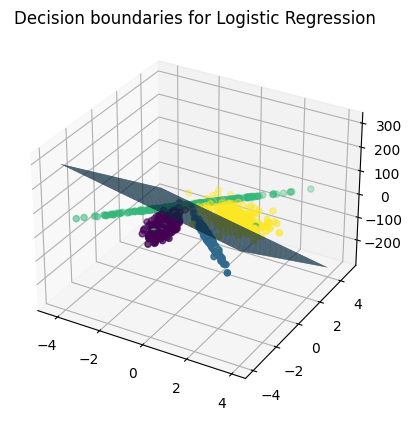

In [63]:
z1 = lambda x1, y1: (-LG1.intercept_[0]-LG1.coef_[0][0]*x1-LG1.coef_[0][1]*y1) / LG1.coef_[0][2]

tmp = np.linspace(-4, 4,100)
x1,y1 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, z1(x1,y1))
ax.scatter(X[:,0], X[:,1], X[:,2], c = y)
ax.set_title('Decision boundaries for Logistic Regression')
plt.show()

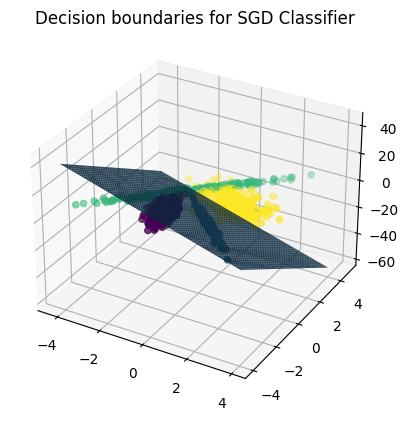

In [64]:
z2 = lambda x2, y2: (-SGD1.intercept_[0]-SGD1.coef_[0][0]*x2-SGD1.coef_[0][1]*y2) / SGD1.coef_[0][2]

tmp = np.linspace(-4, 4,100)
x2,y2 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig2 = plt.figure()
ax2  = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x2, y2, z2(x2,y2))
ax2.scatter(X[:,0], X[:,1], X[:,2], c = y)
ax2.set_title('Decision boundaries for SGD Classifier')
plt.show()